<a href="https://colab.research.google.com/github/v-zeng/data_mining_grad_projects/blob/main/CISC873_DM_F21_A3_zeng_vinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Chest X-ray COVID Classification**

Student: Vinson Zeng

Student #: 05550960

✔️ **Meme competition:**
Include/find a MEME that you liked related to data science/data mining/machine learning

![](https://drive.google.com/uc?export=view&id=1XupFybpytuMBiysKTv1-WBiTZjZxeiBh)

**✔️ Understand the template:**
What is the experimental protocol used and how was it carried out?
How did we tune hyper-parameters in the template?
What is the search space and what is the criteria to determine good/bad hyper-parameters?

Predict if a chest x-ray image is covid-19 positive or negative. The template converts all image files to greyscale and resizes to 256 by 256 pixels. It uses a fully-connected network with three dense layers. The third layer (output) uses a sigmoid activation function. The model uses the Adam algorithm as the optimizer. Loss is measured using ‘binary_crossentropy’ and the metrics are ‘BinaryAccuracy’ and ‘AUC’. The epochs are set to 30, batch size is set to 64, and validation_split is 0.3 or 30% of the training data. Hyperparameter tuning for the template includes examining learning rate, choosing an optimizer and a loss function, and deciding batch size and the number of epochs. We can determine if hyperparameters are good if they decrease the losses and increase model scores with successive iterations for both training and validation.




**✔️ Problem Formulation:**

Define the problem. What is the input?
What is the output?
What data mining function is required?
What could be the challenges?
What is the impact?
What is an ideal solution?

The problem is binary classification of an image. The input is an image (x-ray) and the output is a binary classification (0 or 1). The 1 is mapped to ‘positive’ for covid-19. Challenges include: determining the amount and type of layers along with their parameters, finding optimal hyperparameters, overfitting and underfitting. If the model does not have enough layers and/or enough nodes, it will be unable to learn the training dataset and it will underfit. Too much capacity will result in overfitting. Increasing the complexity and epochs can also increase the training time. Ideally, the model will be simple, yet efficient enough to learn the training data and generalize well. Low loss and high scores should be targeted while trying to prevent over and underfitting.


✔️ **Answer the questions below (briefly):**

🌈 What is the validation method used in the example template? Considering the dataset is a bit small, is it an appropriate approach? If not, what would you suggest? (you are not expected to change but you are allowed to do that if you want)

The example template utilizes an automatic holdout set with ‘validation_split’, which is 0.3 or 30% of the training data. Since the dataset is relatively small, a better approach might be to use k-fold cross validation. This method would give a less biased estimate of the model performance.

🌈What is the default model in the template? Is it a good one for image data? why?

The default model in the template is a fully connected network. It is not as good for feature extraction. Each neuron is connected to previous neurons in the preceding layer with its own weight. No assumptions are made regarding the features in the data. Expensive in regards to memory and computation. There may be issues such as slower training time and the potential of overfitting.

🌈Convolution neural network address what issues of a fully connected neural network and how?

A convolution neural network (CNN) reduces the main image matrix to one of a lower dimension, which is ‘convolution’. CNNs identify and extract the best features from images and is therefore more efficient than the fully connected neural network. Each neuron is connected only to a few local neurons in the previous layer and the same weights are used for all those neurons. Data is interpreted as spatial and have features which are spatially local (e.g., scarring on lung tissue).  CNNs have fewer connections than fully connected neural networks and require less memory and computational power.

🌈What's the different between 1d, 2d, and 3d convolution?

They each ‘slide’ their respective convolution kernels along the relative dimensions. 3D convolution slides the convolution kernels along 3 dimensions, 2D moves along 2 dimensions, and 1D moves along one dimension. Each dimensional convolution has a data output which is one dimension greater - e.g.2D convolution results in 3D data.

🌈What is the difference between convolution and pooling?

Convolution identifies and extracts features from the matrix of data, while pooling only reduces/downsamples the matrix of data.


**Template**

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

  0%|          | 0/487 [00:00<?, ?it/s]

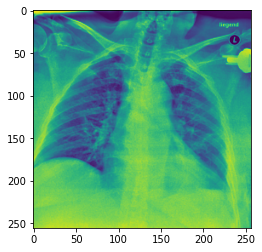

In [ ]:
# check image
import matplotlib.pyplot as plt # import and bind matplotlib.pyplot to 'plt'
plt.imshow(x_train[0, :, :, 0]) # show first image from x_train (red channel)

In [ ]:
# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    flattened = Flatten()(img_in) # flatten input into one-dimensional array
    fc1 = Dense(64)(flattened) # first layer, densely-connected 64 nodes
    #fc1 = Dropout(0.3)(fc1) # randomly set input units to 0 with frequency of 0.3 at each step during training of fc1
    fc2 = Dense(32)(fc1) # second layer, 32 nodes
    #fc2 = Dropout(0.3)(fc2) # randomly set input units to 0 with frequency of 0.3 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function, returns 0 or 1 score/classification for current image
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(), # Adam algorithm for optimizer; how model is updated based on data seen and its loss function
        loss='binary_crossentropy', # cross-entropy loss for binary classification; measures how accurate model is during training, minimize this for model to head in right direction
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network



NameError: ignored

In [ ]:
epochs = 30 # 30 cycles through training data; 1 cycle = forward and backward pass (full pass over training data)
batch_size = 64 # training examples per iteration

# Fit model to training data; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

Epoch 1/30
6/6 [==============================] - 2s 187ms/step - loss: 83951.5781 - binary_accuracy: 0.6235 - auc: 0.5154 - val_loss: 4303.2461 - val_binary_accuracy: 0.3469 - val_auc: 0.5000
Epoch 2/30
6/6 [==============================] - 1s 129ms/step - loss: 9512.4824 - binary_accuracy: 0.5059 - auc: 0.4806 - val_loss: 9700.4824 - val_binary_accuracy: 0.3469 - val_auc: 0.5000
Epoch 3/30
6/6 [==============================] - 1s 131ms/step - loss: 10424.8174 - binary_accuracy: 0.5706 - auc: 0.4787 - val_loss: 926.6317 - val_binary_accuracy: 0.6054 - val_auc: 0.6336
Epoch 4/30
6/6 [==============================] - 1s 132ms/step - loss: 3095.7600 - binary_accuracy: 0.6029 - auc: 0.5571 - val_loss: 4207.2554 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 5/30
6/6 [==============================] - 1s 131ms/step - loss: 4490.6108 - binary_accuracy: 0.5529 - auc: 0.5107 - val_loss: 7996.7832 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 6/30
6/6 [=======================

In [ ]:
# create submission =========================================

x_test = load_data('test')

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial0**
The template submission scored 0.5 for AUC, which could certainly use improvement. The score on the training data is greater than the test (submission), this represents overfitting. It is likely there is noise that has been memorized by the overfitted model.

Standardize pixel values by scaling to a range of 0 to 1 before feeding to neural network model. This can make training faster due to the cost function being more symmetric, which will likely take less steps to reach the global minima. I think there will not be any negative outcomes due to standardization. It may reduce training time, decrease the probability of getting stuck in a local optima, or it may have a neutral effect. I predict that this will help to increase the training and test scores.

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    flattened = Flatten()(img_in) # flatten input into single dimension
    fc1 = Dense(64)(flattened) # first layer, densely-connected 64 units
    #fc1 = Dropout(0.3)(fc1) # randomly set input units to 0 with frequency of 0.3 at each step during training of fc1
    fc2 = Dense(32)(fc1) # second layer, densely-connected 32 units
    #fc2 = Dropout(0.3)(fc2) # randomly set input units to 0 with frequency of 0.3 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 30 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # training examples per iteration

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

  0%|          | 0/487 [00:00<?, ?it/s]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 2)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8388672   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 8,390,785
Trainable params: 8,390,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
6/6 [==============================] - 2s 184ms/step - loss: 283.6840 - binary_accuracy: 0.6176 - auc: 0.5

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission0.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial1**

The training score improved greatly to 0.895 in the training and 0.79708 for the test submission. There is still overfitting of the model on the training data as observed from the lower test score. I will add weight regularization so the model takes on small values to make the weight value distribution more 'regular'. I will first try L1 regularlization, which adds a fixed gradient to the loss at for all values that are not 0. I predict the more sparse model will decrease the difference between training and test scores.

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    flattened = Flatten()(img_in) # flatten input into single dimension
    fc1 = Dense(64, kernel_regularizer = 'l1')(flattened) # first layer, densely-connected 64 units; l1 regularization
    #fc1 = Dropout(0.3)(fc1) # randomly set input units to 0 with frequency of 0.3 at each step during training of fc1
    fc2 = Dense(32)(fc1) # second layer, densely-connected 32 units
    #fc2 = Dropout(0.3)(fc2) # randomly set input units to 0 with frequency of 0.3 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 30 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # training examples per iteration

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

  0%|          | 0/487 [00:00<?, ?it/s]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 2)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8388672   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 8,390,785
Trainable params: 8,390,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
6/6 [==============================] - 2s 208ms/step - loss: 449.6848 - binary_accuracy: 0.5647 - auc: 0.5

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission1.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial2**

The training score using 'l1' regularization in the first layer has decreased the performance of the model. The training AUC score is approximately 0.5 and the test submission score is 0.56635. Although the difference in scores has decreased in comparison to the previous trial, the test score is now greater than the training score. This indicates that the model is underfitting. It is possible the model is too sparse and has the network has not learned enough from the training data. I will try 'l2' regularization. I predict will yield a higher score for both training and testing since 'l2' penalizes the weights parameters without making them sparse.

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    flattened = Flatten()(img_in) # flatten input into single dimension
    fc1 = Dense(64, kernel_regularizer = 'l2')(flattened) # first layer, densely-connected 64 units; l2 regularization (default l2=0.01)
    #fc1 = Dropout(0.3)(fc1) # randomly set input units to 0 with frequency of 0.3 at each step during training of fc1
    fc2 = Dense(32)(fc1) # second layer, densely-connected 32 units
    #fc2 = Dropout(0.3)(fc2) # randomly set input units to 0 with frequency of 0.3 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 30 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # training examples per iteration

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

  0%|          | 0/487 [00:00<?, ?it/s]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 2)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8388672   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 8,390,785
Trainable params: 8,390,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
6/6 [==============================] - 2s 202ms/step - loss: 204.3739 - binary_accuracy: 0.6235 - auc: 0.5

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission2.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial3**

Trial2 resulted in a training AUC score of 0.7296 and a test submission score of 0.78339. Although both the training and test score have increased from the previous trial, the model is underfitting since the training score is less than the test score. It is possible that it is over-regularized. I will attempt to decrease the l2 penalty from the default of 0.01 to 0.1 I predict the training and test scores should have less of a difference in score.

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    flattened = Flatten()(img_in) # flatten input into single dimension
    fc1 = Dense(64, kernel_regularizer = tf.keras.regularizers.L2(0.1))(flattened) # first layer, densely-connected 64 units; l2(0.1) regularization
    #fc1 = Dropout(0.3)(fc1) # randomly set input units to 0 with frequency of 0.3 at each step during training of fc1
    fc2 = Dense(32)(fc1) # second layer, densely-connected 32 units
    #fc2 = Dropout(0.3)(fc2) # randomly set input units to 0 with frequency of 0.3 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 30 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # training examples per iteration

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

  0%|          | 0/487 [00:00<?, ?it/s]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 2)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8388672   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 8,390,785
Trainable params: 8,390,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
6/6 [==============================] - 2s 199ms/step - loss: 264.1150 - binary_accuracy: 0.5647 - auc: 0.4

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission3.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial4**

Trial3 resulted in a training AUC of 0.7681 and a submission score of 0.74914. The loss reaches 2.2382 by the 30th epoch. There is a bit of overfitting on the training data, but this is fairly close in scoring. In this trial I will decrease the learning rate to 0.0001 (default=0.001) since the loss decreases and then increases throughout the epochs. I predict the loss will consistently decrease and the score will increase.

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    flattened = Flatten()(img_in) # flatten input into single dimension
    fc1 = Dense(64, kernel_regularizer = tf.keras.regularizers.L2(0.1))(flattened) # first layer, densely-connected 64 units; l2(0.1) regularization
    # fc1 = Dropout(0.1)(fc1) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc1
    fc2 = Dense(32)(fc1) # second layer, densely-connected 32 units
    # fc2 = Dropout(0.1)(fc2) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 30 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # training examples per iteration

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission4.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial5**

Decreasing the learning rate to 0.0001 increased the loss (9.3774) and increased the the AUC score (0.8383). However, the submission score is 0.77739, which indcates overfitting as it is lower than the training score. I will increase the epochs to 90 to allow the model to train more on the data, as the loss is observed to gradually decrease and has been lower in previous trials. I predict the AUC score will increase with more cycles, but I will keep in mind the need to address the overfitting in the next trial. For now I will keep on trying to improve the overall score.

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    flattened = Flatten()(img_in) # flatten input into single dimension
    fc1 = Dense(64, kernel_regularizer = tf.keras.regularizers.L2(0.1))(flattened) # first layer, densely-connected 64 units; l2(0.1) regularization
    # fc1 = Dropout(0.1)(fc1) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc1
    fc2 = Dense(32)(fc1) # second layer, densely-connected 32 units
    # fc2 = Dropout(0.1)(fc2) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 90 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # training examples per iteration

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

  0%|          | 0/487 [00:00<?, ?it/s]

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 256, 256, 2)]     0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8388672   
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 8,390,785
Trainable params: 8,390,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/90
6/6 [==============================] - 2s 183ms/step - loss: 33.7709 - binary_accuracy: 0.6118 - auc: 0.

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission5.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial6**

The loss does gradually decrease and reaches 5.2951 by the 90th epoch. The training score is 0.7809 and the test score is 0.80265. These are close, but there may be a slight underfitting. However, the training loss is (5.2951) is approximately equal to the validation loss (5.3907). It appears more epochs will improve the model score, as the loss is observed to gradually decrease.I will increase the epochs to 120 for this trail in hopes of improving the model score once again.

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    flattened = Flatten()(img_in) # flatten input into single dimension
    fc1 = Dense(64, kernel_regularizer = tf.keras.regularizers.L2(0.1))(flattened) # first layer, densely-connected 64 units; l2(0.1) regularization
    # fc1 = Dropout(0.1)(fc1) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc1
    fc2 = Dense(32)(fc1) # second layer, densely-connected 32 units
    # fc2 = Dropout(0.1)(fc2) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 120 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # training examples per iteration

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

  0%|          | 0/487 [00:00<?, ?it/s]

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 256, 256, 2)]     0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8388672   
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 8,390,785
Trainable params: 8,390,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
6/6 [==============================] - 2s 193ms/step - loss: 31.9827 - binary_accuracy: 0.5441 - auc: 

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission6.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial7**

The training loss (4.5644) is close to the validation loss (4.9989). However, the training AUC is 0.9374 while the test score is 0.79109. Ths is certainly overfitting. I will add the drop layers (0.1) to the model to see if I can mitigate the overfitting. I predict it should reduce the score differences between training and test.

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    flattened = Flatten()(img_in) # flatten input into single dimension
    fc1 = Dense(64, kernel_regularizer = tf.keras.regularizers.L2(0.1))(flattened) # first layer, densely-connected 64 units; l2(0.1) regularization
    fc1 = Dropout(0.1)(fc1) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc1
    fc2 = Dense(32)(fc1) # second layer, densely-connected 32 units
    fc2 = Dropout(0.1)(fc2) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 120 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # training examples per iteration

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

  0%|          | 0/487 [00:00<?, ?it/s]

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 256, 256, 2)]     0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8388672   
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33 

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission7.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial8**

The Dropout of 0.1 resulted in a final AUC score of 0.8588 for the training and 0.78852 for the test. There is still overfitting based on the difference. Additionally, while th loss for both training and validation decrease, there could be some improvement as it has been observed to be lower in previous trials. For now I will attempt to improve the model score as it has stagnated around 0.8 for multiple trials. I will try doubling the nodes in each layer, which will result in 128 units for the first layer and 64 for the second.

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    flattened = Flatten()(img_in) # flatten input into single dimension
    fc1 = Dense(128, kernel_regularizer = tf.keras.regularizers.L2(0.1))(flattened) # first layer, densely-connected 64 units; l2(0.1) regularization
    fc1 = Dropout(0.1)(fc1) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc1
    fc2 = Dense(64)(fc1) # second layer, densely-connected 32 units
    fc2 = Dropout(0.1)(fc2) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 120 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # training examples per iteration

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

  0%|          | 0/487 [00:00<?, ?it/s]

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 256, 256, 2)]     0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16777344  
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65 

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission8.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial9**

Loss (training: 6.1831, validation: 6.6870) does not reach as low as previous trials. Score is 0.86 for training and 0.79002 for test, which indicates overfitting. I will try continue to try and improve the score, this time using data augmentation to increase the amount of the data for the model to learn from through variations of existing data. I predict that data augmentation will help to generalize the model better.

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input
from tensorflow.keras import layers # required for data augmentation layers

# create data augmentation stage
data_augmentation = tf.keras.Sequential(
    [
     layers.RandomFlip('horizontal_and_vertical'), # random 'horizontal_and_vertical' flipping
     layers.RandomRotation(0.1) # rotation by random amount in range as fraction of 2 Pi
    ]
)

def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    x = data_augmentation(img_in) # augmentation of input image
    flattened = Flatten()(x) # flatten input into single dimension
    fc1 = Dense(128, kernel_regularizer = tf.keras.regularizers.L2(0.1))(flattened) # first layer, densely-connected 64 units; l2(0.1) regularization
    fc1 = Dropout(0.1)(fc1) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc1
    fc2 = Dense(64)(fc1) # second layer, densely-connected 32 units
    fc2 = Dropout(0.1)(fc2) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 120 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # training examples per iteration

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

  0%|          | 0/487 [00:00<?, ?it/s]

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256, 2)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 256, 256, 2)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16777344  
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0   

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission9.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial10**

Trial9 resulted in a training auc score of 0.4653 and submission score of 0.64640. There is underfitting occuring here. Perhaps the training model does not have sufficient samples to train on each cycle. The loss does gradually decrease, but both training and validation losses are greater than in previous trials. I will swap the template with a convolution neural network with pooling layers. Also, I will set epochs=60 from 120 to reduce training time.

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256, 256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input, MaxPooling2D # added MaxPooling2D
from tensorflow.keras import layers # required for data augmentation layers


def build(): # create 'build' function
    img_in = Input(shape=(256, 256, 2)) # instantiate Keras tensor
    cnn1 = Conv2D(32, (3,3), activation='relu')(img_in) # 2D convolution layer with 32 output filters, a 3x3 kernel_size, and Rectified Linear Unit ('relu') activation
    pool1 = MaxPooling2D((2,2))(cnn1) # Max pooling for 2D data for downsampling input along its dimensions, 2x2 pool_size
    cnn2 = Conv2D(64, (3,3), activation='relu')(pool1) # 2D convolution layer with 64 output filters and a 3x3 kernel size with 'relu' activation
    pool2 = MaxPooling2D()(cnn2) # Max pooling using default
    cnn3 = Conv2D(64, (3,3), activation='relu')(pool2)# 2D convolution layer with 64 output filters and a 3x3 kernel size with 'relu' activation

    flattened = Flatten()(cnn3) # flatten input into single dimension
    fc1 = Dense(128, kernel_regularizer = tf.keras.regularizers.L2(0.1))(flattened) # first layer, densely-connected 64 units; l2(0.1) regularization
    fc1 = Dropout(0.1)(fc1) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc1
    fc2 = Dense(64)(fc1) # second layer, densely-connected 32 units
    fc2 = Dropout(0.1)(fc2) # randomly set input units to 0 with frequency of 0.1 at each step during training of fc2
    output = Dense(1, activation = 'sigmoid')(fc2) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function


model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 60 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # training examples per iteration

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs # train model for number of epochs
                    )

  0%|          | 0/487 [00:00<?, ?it/s]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 2)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 254, 254, 32)      608       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 230400)            0   

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission10.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **Trial11**

The loss gradually decreases in both training (0.6001) and validation (0.7856). However, the training score (0.8924) is greater than the submission/test score (0.75). This indicates overfitting. My model is I will increase Dropout rates throughout the network and try layering in a different manner to try and increase the training and test scores. Additionally, I will add class_weight and adjust it according to the class imbalance (approximately 2:1 for '1' and '0' respectively).

In [ ]:
from tqdm.notebook import tqdm # progress bar decorator for iterators
from PIL import Image # Python imaging library Image module: class to represent PIL image
import pandas as pd # import and bind pandas to 'pd'
import os # misc. os interfaces
import numpy as np # import numerical computing for python and bind to 'np'

# change working directory # remove this when finished =========================
os.chdir('/content/drive/MyDrive/CISC873_A3_Data')

# function to read in .png files in a folder, convert, resize, create array from image, append to list
def load_data(folder): # parameter: folder
    images = [] # create empty list
    for file in tqdm(os.listdir(folder)): # iterate through images in folder with progress bar; listdir() returns list of names of entries in directory
        file_id = file.replace('.png', '') # set 'file_id' to image name without '.png'
        image = Image.open( # open and identify image file
            os.path.join(folder, file) # concatenate folder path and image path
        ).convert('LA').resize((256,256)) # convert image to greyscale and resize to 256 by 256 pixels
        arr = np.array(image) # create array from converted and resized image
        images.append( # append to list
            (int(file_id), arr) # convert file_id to integer number and use as index for image array in list
        )
    images.sort(key=lambda i: i[0]) # sort images by index
    return np.array([v for _id, v in images]) # return array built from list of images



x_train = load_data('train') # independent variables
x_train = x_train/255.0 # standardize by scaling to range of 0 to 1
y_train = pd.read_csv('y_train.csv')['infection'] # dependent/target variable

#===============================================================================

# import modules and functions for tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input, MaxPooling2D # added MaxPooling2D
from tensorflow.keras import layers # required for data augmentation layers



# build model
def build(): # create 'build' function
    img_in = Input(shape=(256,256,2)) # instantiate Keras tensor and specify input shape
    cnn1 = Conv2D(32, (3,3), padding='same', activation='relu')(img_in) # 2D convolution layer with 32 output filters, a kernel_size 5x5, and Rectified Linear Unit ('relu') activation
    cnn2 = Conv2D(32, (3,3), padding='same', activation='relu')(cnn1) # 2D convolution layer with 32 output filters and a 3x3 kernel size with 'relu' activation
    cnn2 = Dropout(0.3)(cnn2) # randomly set input units to 0 with frequency of 0.3
    pool1 = MaxPooling2D((2,2))(cnn2) # Max pooling with (3,3) pool_size and (1,1) stride
    cnn3 = Conv2D(64, (3,3), padding='same', activation='relu')(pool1)# 2D convolution layer with 64 output filters and a 3x3 kernel size with 'relu' activation
    pool2 = MaxPooling2D((2,2))(cnn3) # Max pooling with (2,2) pool_size
    pool2 = Dropout(0.3)(pool2) # randomly set input units to 0 with frequency of 0.3
    cnn4 = Conv2D(64, (3,3), padding='same', activation='relu')(pool2) # 2D convolution layer with 64 output filters and a 3x3 kernel size with 'relu' activation
    pool3 = MaxPooling2D((2,2))(cnn4) # Max pooling with (2,2) pool_size
    pool3 = Dropout(0.3)(pool3) # randomly set input units to 0 with frequency of 0.3

    flattened = Flatten()(pool3) # flatten input into single dimension
    fc1 = Dense(128,activation='relu')(flattened) # densely-connected layer with 64 units
    fc1 = Dropout(0.3)(fc1) # randomly set input units to 0 with frequency of 0.5
    output = Dense(1, activation = 'sigmoid')(fc1) # output/final layer with sigmoid/logistic function
    model = tf.keras.Model(inputs=img_in, outputs=output) # create model from input and ouputs
    return model # return model created in function

model = build() # subclass model
model.compile( # config model for training
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam algorithm for optimizer
        loss='binary_crossentropy', # cross-entropy loss for binary classification
        metrics=['BinaryAccuracy', 'AUC'] # metrics list: BinaryAccuracy computes freq. which y_pred matches y_true, AUC scoring
        )

model.summary() # print string summary of network

# ==============================================================================

epochs = 30 # 30 cycles through training data; 1 cycle = forward and backward pass
batch_size = 64 # 64 training examples per iteration
class_weights = {0: 2, 1: 1} # there are approximately 2:1 samples for '1' and '0' covid classification

# History callback; lists successive losses and metrics
history = model.fit(x = x_train, # independent training variables
                    y = y_train, # target/dependent training variable
                    batch_size = batch_size, # number of samples per batch of computation
                    validation_split=0.3, # fraction of training data for validation data; not trained on
                    epochs=epochs, # train model for number of epochs
                    class_weight = class_weights # add class weight
                    )

  0%|          | 0/487 [00:00<?, ?it/s]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 2)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      608       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
dropout (Dropout)            (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0     

In [ ]:
# create submission

x_test = load_data('test')
x_test = x_test/255.0 # standardize by scaling to range of 0 to 1

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission11.csv', index=False)

  0%|          | 0/210 [00:00<?, ?it/s]

### **End Thoughts**

Trial11 test score was 0.76155. The training score was 0.9417, which clearly is overfitting. The dropout could be increased some more to attempt to mitigate the overfitting in future trials. Class weight did not seem to improve the model performance much, but this was only a single attempt at it. This was my first time with tensorflow and working with a fully connected network and a CNN. There are many modifications, such as adding layers, and fine-tuning steps to be done. Much overfitting was observed and it was challenging to manually adjust. There are hyperparameter tuning options that I will explore at my leisure. Transfer learning and up-training are also on my to-do list as I continue to learn.